<a href="https://colab.research.google.com/github/jyb20121302/aa01-iot/blob/master/iot_csv_aa01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Pandas: Loading the remote csv file

> [Pandas: Tutorial-reas_csv()](https://www.marsja.se/pandas-read-csv-tutorial-to-csv/amp/)

In [0]:
import pandas as pd

In [0]:
# url="http://chaos.inje.ac.kr:3030/data/ppg5k.csv"  # CORS powered express server!
c=pd.read_csv('AA01_s1000.csv', index_col='date')

In [17]:
c.shape

(1000, 3)

In [18]:
c.head()

,temperature,humidity,luminosity
date,,,
2018-11-27 18:13:44.103,21.0,29.4,145
2018-11-27 18:13:41.829,21.0,29.5,146
2018-11-27 18:13:39.556,21.0,29.6,146
2018-11-27 18:13:37.283,21.0,29.5,145
2018-11-27 18:13:35.009,21.0,29.4,145


In [19]:
c.tail()

,temperature,humidity,luminosity
date,,,
2018-11-27 17:36:02.090,20.9,30.6,152
2018-11-27 17:35:59.818,20.9,30.7,154
2018-11-27 17:35:57.544,20.9,30.8,147
2018-11-27 17:35:55.270,20.9,31.0,139
2018-11-27 17:35:52.998,20.9,31.0,140


In [0]:
c.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5000 entries, 2015-07-24 12:43:00.7 to 2015-07-24 12:47:12.3
Data columns (total 1 columns):
PPG    5000 non-null int64
dtypes: int64(1)
memory usage: 78.1+ KB


In [0]:
c_s = c.sort_index()

In [21]:

c_s.head()

,temperature,humidity,luminosity
date,,,
2018-11-27 17:35:52.998,20.9,31.0,140
2018-11-27 17:35:55.270,20.9,31.0,139
2018-11-27 17:35:57.544,20.9,30.8,147
2018-11-27 17:35:59.818,20.9,30.7,154
2018-11-27 17:36:02.090,20.9,30.6,152


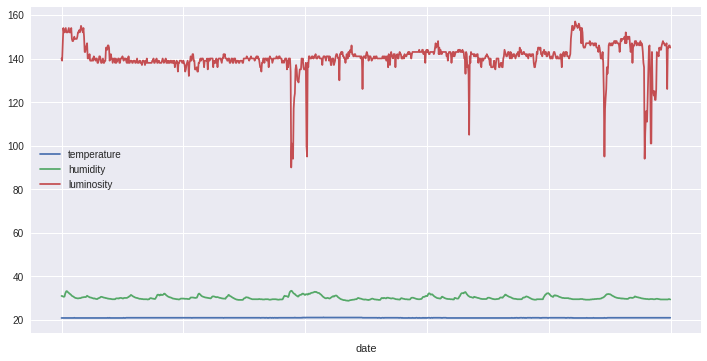

In [24]:

c_s.plot(figsize=(12,6))

### iot data
> Sensor data from Arduino with CdS and DHT22

- temperature
- humidity
- luminosity

In [0]:
# url="http://chaos.inje.ac.kr:3030/data/iot_chaos.csv"
iot=pd.read_csv('AA01_s1000.csv', index_col='date')

In [27]:
iot.shape

(1000, 3)

In [28]:
iot.head()

,temperature,humidity,luminosity
date,,,
2018-11-27 18:13:44.103,21.0,29.4,145
2018-11-27 18:13:41.829,21.0,29.5,146
2018-11-27 18:13:39.556,21.0,29.6,146
2018-11-27 18:13:37.283,21.0,29.5,145
2018-11-27 18:13:35.009,21.0,29.4,145


In [29]:
iot.tail()

,temperature,humidity,luminosity
date,,,
2018-11-27 17:36:02.090,20.9,30.6,152
2018-11-27 17:35:59.818,20.9,30.7,154
2018-11-27 17:35:57.544,20.9,30.8,147
2018-11-27 17:35:55.270,20.9,31.0,139
2018-11-27 17:35:52.998,20.9,31.0,140


In [30]:
iot.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1000 entries, 2018-11-27 18:13:44.103 to 2018-11-27 17:35:52.998
Data columns (total 3 columns):
temperature    1000 non-null float64
humidity       1000 non-null float64
luminosity     1000 non-null int64
dtypes: float64(2), int64(1)
memory usage: 31.2+ KB


### Sort index by date

In [0]:
iot_s = iot.sort_index()

In [32]:
iot_s.head()

,temperature,humidity,luminosity
date,,,
2018-11-27 17:35:52.998,20.9,31.0,140
2018-11-27 17:35:55.270,20.9,31.0,139
2018-11-27 17:35:57.544,20.9,30.8,147
2018-11-27 17:35:59.818,20.9,30.7,154
2018-11-27 17:36:02.090,20.9,30.6,152


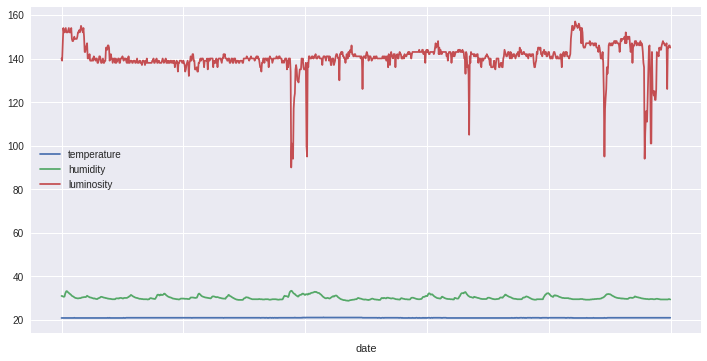

In [33]:
iot_s.plot(figsize=(12,6))

In [34]:
iot_s.mean()

temperature     20.9760
humidity        30.2034
luminosity     140.5880
dtype: float64

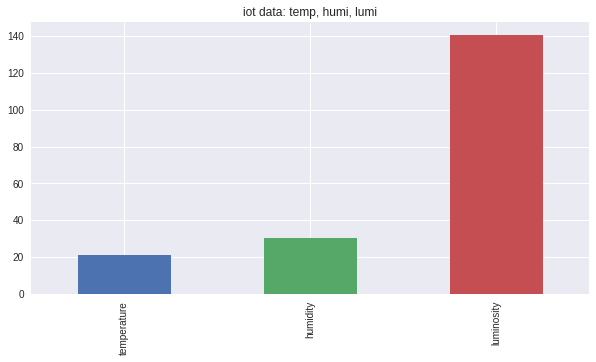

In [35]:
iot_s.mean().plot.bar(figsize=(10,5), title="iot data: temp, humi, lumi")

## Plot the change of sensor data over various time spans.

- resample the data at different frequency
- time span: 60 sec, 1 hour, 1 day, 1 week

In [36]:
iot_s.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1000 entries, 2018-11-27 17:35:52.998 to 2018-11-27 18:13:44.103
Data columns (total 3 columns):
temperature    1000 non-null float64
humidity       1000 non-null float64
luminosity     1000 non-null int64
dtypes: float64(2), int64(1)
memory usage: 31.2+ KB


In [37]:
# type of index
iot_s.index[0], type(iot_s.index[0])

('2018-11-27 17:35:52.998', str)

In [0]:
# Convert index to timestamp
iot_s.index = pd.to_datetime(iot_s.index)

In [39]:
iot_s.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1000 entries, 2018-11-27 17:35:52.998000 to 2018-11-27 18:13:44.103000
Data columns (total 3 columns):
temperature    1000 non-null float64
humidity       1000 non-null float64
luminosity     1000 non-null int64
dtypes: float64(2), int64(1)
memory usage: 31.2 KB


In [45]:
# Estimate the mean of iot_s for every hour
iot_s.resample('60S').mean()  # mean per each 1minute

,temperature,humidity,luminosity
date,,,
2018-11-27 17:35:00,20.900000,30.875000,145.000000
2018-11-27 17:36:00,20.903846,31.203846,151.192308
2018-11-27 17:37:00,20.900000,30.319231,144.846154
2018-11-27 17:38:00,20.907407,29.996296,140.666667
2018-11-27 17:39:00,20.915385,29.880769,139.384615
2018-11-27 17:40:00,21.000000,30.281481,138.592593
2018-11-27 17:41:00,21.000000,30.061538,138.461538
2018-11-27 17:42:00,21.000000,30.819231,138.461538
2018-11-27 17:43:00,20.996296,29.729630,137.777778


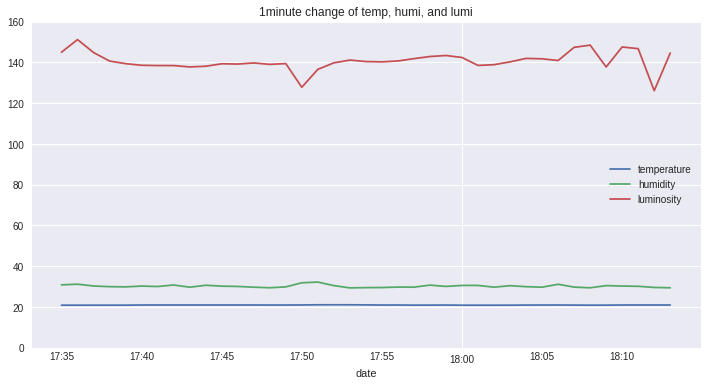

In [55]:
#  Plot mean of the iot data per every hour 
iot_s.resample('60S').mean().plot(figsize=(12,6), title='1minute change of temp, humi, and lumi', 
                                ylim=[0,160])

In [48]:
# Estimate the mean of iot_s for every hour
iot_s.resample('300S').mean()  # mean per each 5minute

,temperature,humidity,luminosity
date,,,
2018-11-27 17:35:00,20.906422,30.366055,144.027523
2018-11-27 17:40:00,20.999242,30.309091,138.280303
2018-11-27 17:45:00,20.993182,29.884848,139.340909
2018-11-27 17:50:00,21.075000,30.713636,137.174242
2018-11-27 17:55:00,20.962121,29.996212,141.818182
2018-11-27 18:00:00,20.913636,30.278788,140.393939
2018-11-27 18:05:00,20.952273,30.124242,143.287879
2018-11-27 18:10:00,21.000000,29.909091,141.111111


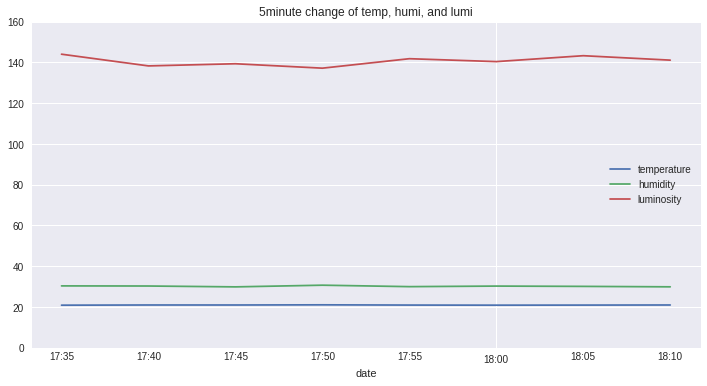

In [54]:
#  Plot mean of the iot data per every hour 
iot_s.resample('300S').mean().plot(figsize=(12,6), title='5minute change of temp, humi, and lumi', 
                                ylim=[0,160])

In [51]:
# Estimate the mean of iot_s for every hour
iot_s.resample('600S').mean()  # mean per each 10minute

,temperature,humidity,luminosity
date,,,
2018-11-27 17:30:00,20.906422,30.366055,144.027523
2018-11-27 17:40:00,20.996212,30.096970,138.810606
2018-11-27 17:50:00,21.018561,30.354924,139.496212
2018-11-27 18:00:00,20.932955,30.201515,141.840909
2018-11-27 18:10:00,21.000000,29.909091,141.111111


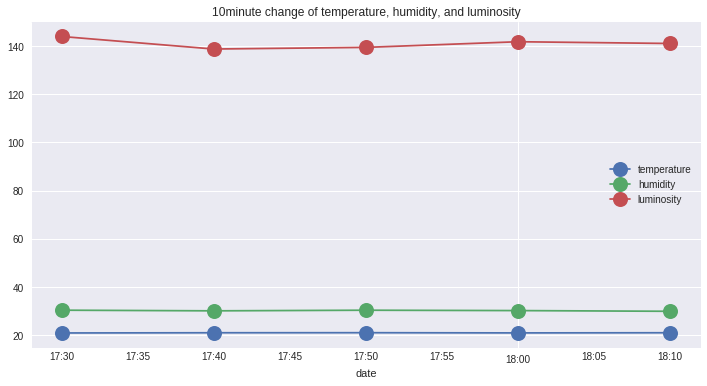

In [58]:
#  Plot mean of the iot data per every day
iot_s.resample('600S').mean().plot(kind='line', marker='o', ms=15, figsize=(12,6), title='10minute change of temperature, humidity, and luminosity')



---

